In [75]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

The target of the project is to have a hands on full data analytics experience from A to Z. That means starting with raw data and reading it into python then doing some analytical and statstical observations on the data and finally doing some supervised and unsupervised learning on the data. The data we will use for this project is one of the most famous datasets in the machine learning world which is called IRIS classification dataset. That means there is plenty of resources for you online to learn from and that you are not the first person who saw and analyzed this data. Use this to your advantage. The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems" as an example of linear discriminant analysis. We will describe it more in details later. The project measures the capabilities of lodaing data, cleaning it up, running some tests and statistical analysis and finally machine learning. The following highlights the project
-  The project consists of four parts, they are mostly independent and in order based on what we studies in class
-  The deadline of the project is the last day of the quarter
-  The project is individual, however I encourage you to talk to each other to check your different approaches without copying codes or talking about detailed code specific. For example, it is ok to ask about which function you have used to tackle part a and is it better than this other function or not. It is not ok to copy the exact code including that function you asked about.
- You are expected to heavily utilize resources outside the class notebooks such as Google, StackOverflow, .. etc
- Code cleanings and Display has 10% of the grade

# Part1: Data Loading and Cleaning up
The iris flower dataset consists of 150 collected observations for different flower's charachteristics. The dataset contains four attributes. These four attributes help decide which Iris class does the flower belong to. The four attributes are sepal length, sepal width, petal length, and petal width; all in cm. The data set contains 3 classes Iris Setosa, Iris Versicolour, and Iris Virginica. For more info about the dataset, you can chek [this link](https://en.wikipedia.org/wiki/Iris_flower_data_set). The end target of the project will be to build a model that can predict, based on the four attributes, which class does the flower belong to.

In the first part of the project we will start by loading the data and cleaning up any problems within the data. 

- load the Iris dataset using the file iris.data. You can open it with any text editor to find out how it looks like. Decide which separator you would like to use and if any rows needs to be skipped
<br>
Now let's do some exploring
- How many rows and colums are in the file
- How many nulls in the file
- Which rows contains nans and how many nans in each of these rows
- How many nans per columns?
- The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" based on the original paper. Is that what you have? If not, fix it
- The 39th sample: 4.9,3.6,1.4,0.1,"Iris-setosa",  where the errors are in the second and third features. Fix it

In [76]:
# Solve Here
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats

In [77]:
# Load the data and skip rows with comments
df=pd.read_csv('iris_not_clean.data', names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], skiprows=[1, 34],
               sep='|')
df.head() #check sample of the new data


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [78]:
print('There are', df.shape[0], 'rows and',df.shape[1], 'colums in the file') #number of rows and columns in the file
print('******************************************')
print('There are',df.isna().sum().sum(), 'nans in the file') #total number of nans in the file
print('*****************************')
print('Nulls in each column\n',df.isna().sum()) # Number of nans in each column


There are 153 rows and 5 colums in the file
******************************************
There are 9 nans in the file
*****************************
Nulls in each column
 sepal length    2
sepal width     1
petal length    2
petal width     2
class           2
dtype: int64


In [79]:
#Number of nans in each row
null_col=df.columns[df.isna().any()]
print(df[df.isna().any(axis=1)][null_col]) #rows contain nulls
df[df.isna().any(axis=1)][null_col].index 
num_nans =df[df.isnull().any(axis=1)][null_col].isna().sum(axis=1) #number of null in each row
print('*********************************\nNan in each row\n',num_nans)


    sepal length  sepal width  petal length  petal width        class
28           5.2          3.4           NaN          0.2  Iris-setosa
29           NaN          NaN           NaN          NaN          NaN
44           NaN          3.2           2.1          NaN          NaN


Int64Index([28, 29, 44], dtype='int64')

*********************************
Nan in each row
 28    1
29    5
44    3
dtype: int64


In [80]:
#Inserting a new value in 34th sample
df.loc[[34]]=[4.9,3.1,1.5,0.2,"Iris-setosa"]
print(df.loc[[34]])

    sepal length  sepal width  petal length  petal width        class
34           4.9          3.1           1.5          0.2  Iris-setosa


In [81]:
#Inserting a new value in 39th sample
df.loc[[38]]=[4.9,3.6,1.4,0.2,"Iris-setosa"]
print(df.loc[[38]])

    sepal length  sepal width  petal length  petal width        class
38           4.9          3.6           1.4          0.2  Iris-setosa


# Part 2: Stastical Exploring
In this part we will understand a little more about the data and do some cool plottings
- What is the mean and variance for each column and use the function describe to get insights about the data
- Drop the nan rows
- Recaluclate the mean and variance for each column
- What is the correlation between the fourth column and each of the other three columns individually? Any observations
- How many records exist for each class. # Hint, you can do this in one line by using groupby
- Change the random seed to 1234 and randomly pick 20 samples of the data and display it
- Plot histogram for all the data attributes
- Plot histogram for all the data attributes per feature, i.e. grouped by features

In [82]:
print('Mean of each column\n',df.mean(axis=0)) #mean of each column
print('*****************************')
print('Variance of each column\n',df.var(axis=0)) # Variance of each column
df.describe() #insights about the data


Mean of each column
 sepal length    5.829801
sepal width     3.053289
petal length    3.747020
petal width     1.192715
dtype: float64
*****************************
Variance of each column
 sepal length    0.699973
sepal width     0.179724
petal length    3.113841
petal width     0.583747
dtype: float64


,sepal length,sepal width,petal length,petal width
count,151.000000,152.000000,151.000000,151.000000
mean,5.829801,3.053289,3.747020,1.192715
std,0.836644,0.423939,1.764608,0.764033
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [83]:
df = df.dropna() #dropping rows with nans


In [84]:
print('Mean of each column\n',df.mean(axis=0)) #mean of each column after droping Nans
print('*****************************')
print('Variance of each column\n',df.var(axis=0)) # Variance of each column after droping Nans
df.describe() #insights about the data after droping Nans


Mean of each column
 sepal length    5.834000
sepal width     3.050000
petal length    3.758000
petal width     1.199333
dtype: float64
*****************************
Variance of each column
 sepal length    0.701991
sepal width     0.181174
petal length    3.116412
petal width     0.581006
dtype: float64


,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.834000,3.050000,3.758000,1.199333
std,0.837849,0.425646,1.765336,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [85]:
#correlation between the fourth column and each of the other three columns individually
for data in df.columns:
    try:
        print(data,np.correlate(df['petal width'],df[data]))
    except TypeError:
           pass

sepal length [1127.86]
sepal width [531.72]
petal length [869.1]
petal width [302.33]


In [86]:
#Number of records in each class
for i in df.columns:
    counter= df.groupby([i]).count() 
print(counter)


                 sepal length  sepal width  petal length  petal width
class                                                                
Iris-setosa                50           50            50           50
Iris-versicolor            50           50            50           50
Iris-virginica             50           50            50           50


In [87]:
#Displaying randomly picked 20 samples of the data
np.random.seed(1234)
df.sample(n=20)

,sepal length,sepal width,petal length,petal width,class
94,6.1,3.0,4.6,1.4,Iris-versicolor
66,6.1,2.9,4.7,1.4,Iris-versicolor
106,6.3,2.9,5.6,1.8,Iris-virginica
6,4.6,3.4,1.4,0.3,Iris-setosa
62,5.2,2.7,3.9,1.4,Iris-versicolor
31,4.8,3.1,1.6,0.2,Iris-setosa
27,5.2,3.5,1.5,0.2,Iris-setosa
37,5.5,3.5,1.3,0.2,Iris-setosa
102,5.7,2.8,4.1,1.3,Iris-versicolor
125,7.7,2.8,6.7,2.0,Iris-virginica


(array([0.18518519, 0.44444444, 0.24074074, 0.48148148, 0.2962963 ,
        0.48148148, 0.33333333, 0.11111111, 0.09259259, 0.11111111]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <a list of 10 Patch objects>)

Text(0.5,1,'sepal length')

(array([0.11111111, 0.19444444, 0.61111111, 0.66666667, 1.05555556,
        0.86111111, 0.27777778, 0.30555556, 0.05555556, 0.02777778]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <a list of 10 Patch objects>)

Text(0.5,1,'sepal width')

(array([0.4180791 , 0.14689266, 0.        , 0.03389831, 0.09039548,
        0.29378531, 0.32768362, 0.20338983, 0.12429379, 0.05649718]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <a list of 10 Patch objects>)

Text(0.5,1,'petal length')

(array([1.13888889, 0.22222222, 0.02777778, 0.19444444, 0.22222222,
        0.91666667, 0.16666667, 0.63888889, 0.25      , 0.38888889]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <a list of 10 Patch objects>)

Text(0.5,1,'petal width')

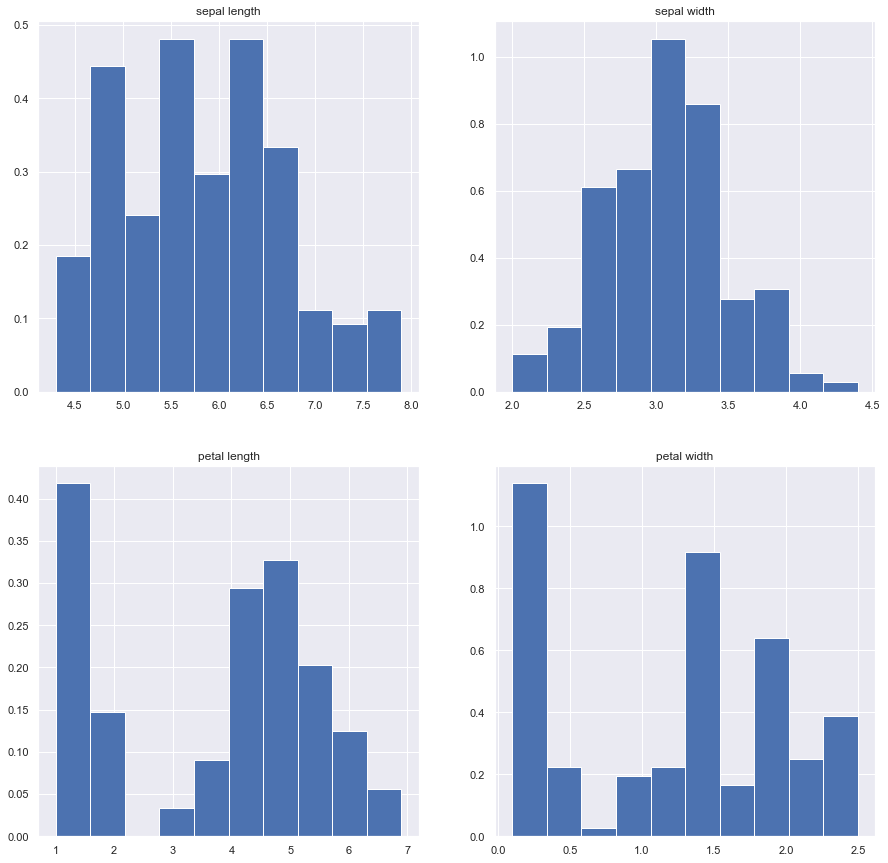

In [88]:
# Plot histogram for all the data attributes
fig = plt.figure(figsize=(15,15)) #Plot size
i=0
for el in df.columns[0:4]:
    i+=1
    x=df[el]
    plt.subplot(2,2,i) #subplots
    plt.hist(x, density=True) #histogram for each column
    plt.title(el, loc='center') #title for each plot
    

(array([0.66666667, 0.13333333, 0.8       , 0.66666667, 1.73333333,
        1.06666667, 0.4       , 0.66666667, 0.13333333, 0.4       ]),
 array([4.3 , 4.45, 4.6 , 4.75, 4.9 , 5.05, 5.2 , 5.35, 5.5 , 5.65, 5.8 ]),
 <a list of 10 Patch objects>)

Text(0.5,1,'Iris-setosa sepal length')

(array([0.0952381 , 0.        , 0.0952381 , 1.04761905, 0.66666667,
        1.42857143, 0.57142857, 0.57142857, 0.19047619, 0.0952381 ]),
 array([2.3 , 2.51, 2.72, 2.93, 3.14, 3.35, 3.56, 3.77, 3.98, 4.19, 4.4 ]),
 <a list of 10 Patch objects>)

Text(0.5,1,'Iris-setosa sepal width')

(array([0.22222222, 0.22222222, 0.44444444, 1.77777778, 2.44444444,
        3.11111111, 1.55555556, 0.88888889, 0.        , 0.44444444]),
 array([1.  , 1.09, 1.18, 1.27, 1.36, 1.45, 1.54, 1.63, 1.72, 1.81, 1.9 ]),
 <a list of 10 Patch objects>)

Text(0.5,1,'Iris-setosa petal length')

(array([ 2. ,  0. , 11.6,  2.8,  0. ,  0. ,  2.8,  0. ,  0.4,  0.4]),
 array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ]),
 <a list of 10 Patch objects>)

Text(0.5,1,'Iris-setosa petal width')

(array([0.38095238, 0.0952381 , 0.57142857, 0.95238095, 0.47619048,
        0.76190476, 0.47619048, 0.28571429, 0.47619048, 0.28571429]),
 array([4.9 , 5.11, 5.32, 5.53, 5.74, 5.95, 6.16, 6.37, 6.58, 6.79, 7.  ]),
 <a list of 10 Patch objects>)

Text(0.5,1,'Iris-versicolor sepal length')

(array([0.14285714, 0.28571429, 0.85714286, 0.57142857, 0.42857143,
        1.57142857, 1.        , 1.57142857, 0.42857143, 0.28571429]),
 array([2.  , 2.14, 2.28, 2.42, 2.56, 2.7 , 2.84, 2.98, 3.12, 3.26, 3.4 ]),
 <a list of 10 Patch objects>)

Text(0.5,1,'Iris-versicolor sepal width')

(array([0.0952381 , 0.19047619, 0.28571429, 0.19047619, 0.76190476,
        0.66666667, 0.57142857, 0.95238095, 0.66666667, 0.38095238]),
 array([3.  , 3.21, 3.42, 3.63, 3.84, 4.05, 4.26, 4.47, 4.68, 4.89, 5.1 ]),
 <a list of 10 Patch objects>)

Text(0.5,1,'Iris-versicolor petal length')

(array([1.75, 0.75, 1.25, 3.25, 0.  , 1.75, 2.5 , 0.75, 0.25, 0.25]),
 array([1.  , 1.08, 1.16, 1.24, 1.32, 1.4 , 1.48, 1.56, 1.64, 1.72, 1.8 ]),
 <a list of 10 Patch objects>)

Text(0.5,1,'Iris-versicolor petal width')

(array([0.06666667, 0.        , 0.33333333, 0.33333333, 0.53333333,
        0.6       , 0.66666667, 0.33333333, 0.06666667, 0.4       ]),
 array([4.9, 5.2, 5.5, 5.8, 6.1, 6.4, 6.7, 7. , 7.3, 7.6, 7.9]),
 <a list of 10 Patch objects>)

Text(0.5,1,'Iris-virginica sepal length')

(array([0.125, 0.5  , 0.25 , 1.5  , 0.25 , 2.   , 1.   , 0.25 , 0.125,
        0.25 ]),
 array([2.2 , 2.36, 2.52, 2.68, 2.84, 3.  , 3.16, 3.32, 3.48, 3.64, 3.8 ]),
 <a list of 10 Patch objects>)

Text(0.5,1,'Iris-virginica sepal width')

(array([0.08333333, 0.41666667, 1.        , 0.33333333, 0.75      ,
        0.66666667, 0.41666667, 0.16666667, 0.08333333, 0.25      ]),
 array([4.5 , 4.74, 4.98, 5.22, 5.46, 5.7 , 5.94, 6.18, 6.42, 6.66, 6.9 ]),
 <a list of 10 Patch objects>)

Text(0.5,1,'Iris-virginica petal length')

(array([0.54545455, 0.18181818, 0.18181818, 2.        , 0.90909091,
        1.09090909, 1.09090909, 0.54545455, 1.45454545, 1.09090909]),
 array([1.4 , 1.51, 1.62, 1.73, 1.84, 1.95, 2.06, 2.17, 2.28, 2.39, 2.5 ]),
 <a list of 10 Patch objects>)

Text(0.5,1,'Iris-virginica petal width')

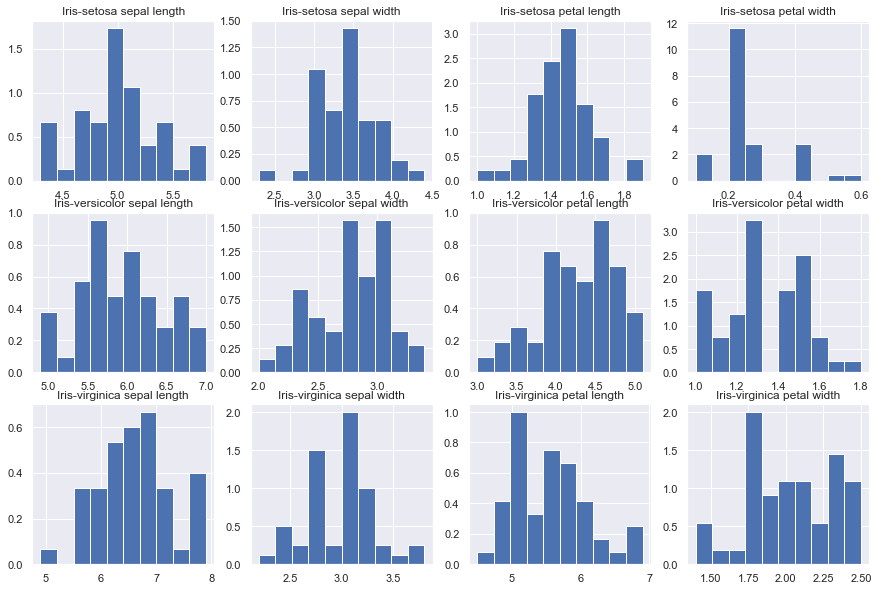

In [89]:
#Histogram for all the data attributes per feature
fig = plt.figure(figsize=(15,10)) #plot size
i=0
for flower_class in df['class'].unique():
    flower=df[df['class']==flower_class]
    for flower_details in flower.columns[0:4]:
        i+=1
        plt.subplot(3,4,i) #subplots
        plt.hist(flower[flower_details], density=True)  # Histogram for each attribute per feature
        plt.title(flower_class+' '+flower_details, loc='center') #title for each plot

        

# Part 3: Statistical Analysis 
In this part, you will explore some curve fitting and dimensionality reductions attributes


- Use Scipy pdf fitting to do a curve fitting for the petal-length
- Plot the normalized histogrm of the petal-length and the estimated pdf on the same figure
- Generate new 500 samples using the estimated pdf for the petal-length 
- Calculate the mean of the new samples and compare how close it is to the mean of the given data

(array([0.4180791 , 0.14689266, 0.        , 0.03389831, 0.09039548,
        0.29378531, 0.32768362, 0.20338983, 0.12429379, 0.05649718]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <a list of 10 Patch objects>)

Text(0.5,0,'Samples')

Text(0,0.5,'Density')

Mean of Petal Length 3.95
Mean of the given data 3.7580000000000027


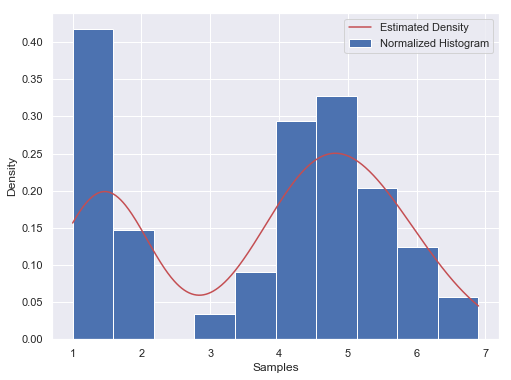

In [90]:
x1=df['petal length'] 
xs = np.linspace(x1.min(), x1.max(), 500)
kde1 = scipy.stats.gaussian_kde(x1)  # find out the best fit

fig = plt.figure(figsize=(8, 6))

plt.hist(x1, density=True, label='Normalized Histogram')  # rug plot
plt.plot(xs, kde1(xs), 'r-', label="Estimated Density")  # test your fit
plt.xlabel('Samples')
plt.ylabel('Density')
plt.legend()

print('Mean of Petal Length', xs.mean())
print('Mean of the given data',df['petal length'].mean())

In [91]:
data = df.drop(['class'], axis=1) #Drop the class column


### PCA
- Use Scikit to do PCA on the IRIS dataset
- do a bar plot that shows the importance of info in each of the new dimensions
- use PCA to reduce the number of attributes by 1. Note that for all the next parts, you will use the reduced data

array([0.92651419, 0.05107563, 0.01722347, 0.00518671])

<BarContainer object of 4 artists>

(150, 4)

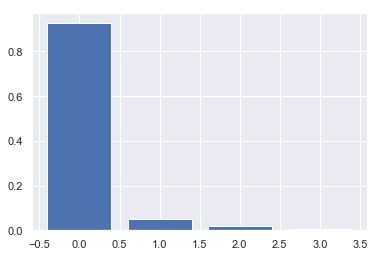

In [92]:
#used Scikit to do PCA on the IRIS dataset
from sklearn.decomposition import PCA
pca_all=PCA()
reduced_data_pca = pca_all.fit_transform(data) # Trasform and fit
pca_all.explained_variance_ratio_
plt.bar(np.arange(4),pca_all.explained_variance_ratio_)
reduced_data_pca.shape

(150, 3)

<BarContainer object of 3 artists>

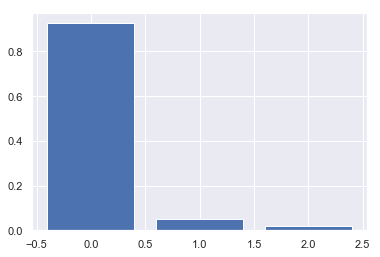

In [93]:
#Reduce the number of attributes by 1
pca = PCA(n_components=3)

# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(data)

# Inspect the shape
reduced_data_pca.shape
plt.bar(np.arange(3),pca.explained_variance_ratio_)

# Part 4: Machine Learning
In this part, you will explore the use of supervised and non supervised learning

### Non-Supervised Learning 
- using Kmeans, divide the data into different clusters. The number of clusters should be the same as the number of categories you have in the data
- Do scatter plot for each two combination of the three dimensions together (0 vs 1), (0 vs 2), (1 vs 2). Use the kmeans labels to color the points in the scatter plots

In [94]:
#Kmeans, divide the data into different clusters
from sklearn.cluster import KMeans
my_kmeans_model=KMeans(n_clusters=3)
my_kmeans_model.fit(reduced_data_pca)
my_kmeans_model.cluster_centers_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

array([[-2.6465677 ,  0.18814655,  0.01458252],
       [ 0.67609704, -0.30868667, -0.04458593],
       [ 2.37922022,  0.25608542,  0.05355793]])

In [95]:
my_kmeans_model.labels_ #kmeans labels to color the points in the scatter plots

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

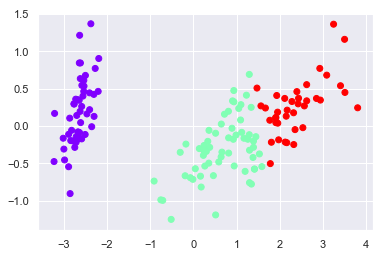

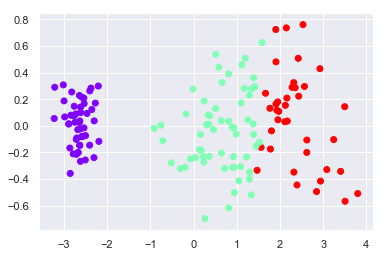

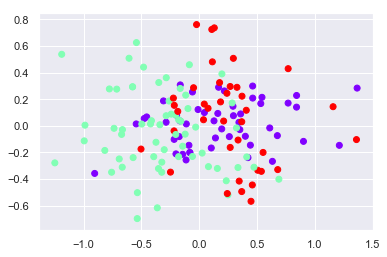

In [96]:
#Scatter plot for each two combination of the three dimensions together (0 vs 1), (0 vs 2), (1 vs 2)
plt.scatter(reduced_data_pca[:,0], reduced_data_pca[:,1], c=my_kmeans_model.labels_,cmap='rainbow')
plt.figure()
plt.scatter(reduced_data_pca[:,0], reduced_data_pca[:,2], c=my_kmeans_model.labels_,cmap='rainbow')
plt.figure()
plt.scatter(reduced_data_pca[:,1], reduced_data_pca[:,2], c=my_kmeans_model.labels_,cmap='rainbow')

In [97]:
reduced_data_pca.shape #check shape of reduced data before training


(150, 3)

### Supervised-Learning
- Divide your dataset to 80% training and 20% validation
- Build a Logistci regression model for the reduced IRIS dataset
- What is the training accuracy
- What is the validation accuracy
- Form the confusion matrix

In [98]:
#Divide your dataset to 80% training and 20% validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(reduced_data_pca, df['class'], train_size=0.80, test_size=0.2)


In [99]:
#Logistic regression model for the reduced IRIS dataset
from sklearn.linear_model import LogisticRegression
Logmod=LogisticRegression()
Logmod.fit(x_train, y_train)
predicted = Logmod.predict(x_test)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [100]:
#Form the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, predicted)
cm

array([[ 9,  0,  0],
       [ 0, 10,  3],
       [ 0,  0,  8]], dtype=int64)

In [101]:
#Training accuracy
score = Logmod.score(x_test, y_test) 
print(score)


0.9


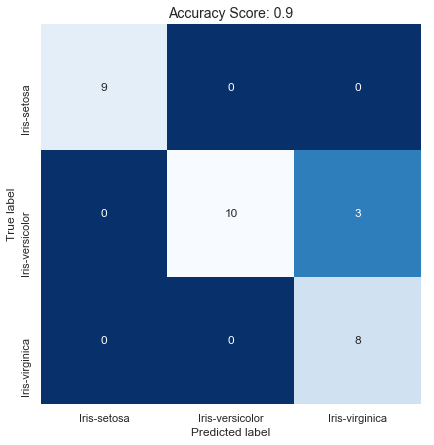

In [102]:
#validation accuracy
import seaborn as sns; sns.set()  #For plot styling
plt.figure(figsize=(7,7)) #figure size 
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap = 'Blues_r',
            xticklabels=df['class'].unique(),
            yticklabels=df['class'].unique());
plt.ylabel('True label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score) 
plt.title(all_sample_title, size = 14); #Title 

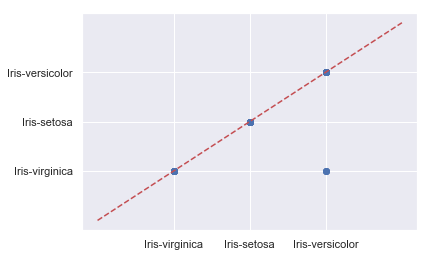

In [103]:
plt.scatter(y_test, predicted)
plt.plot([-1,3], [-1,3], 'r--')